<h2 style="text-align:center;">Electric Vehicle Data Analysis Project</h2>

<h3 style="text-align:center;">Python-Final Project</h3>

---

<h4>Task 2: You suspect some EVs have unusually high or low energy consumption.</h4>

**Find the outliers in the mean - Energy consumption [kWh/100 km] column.**

---

**Step 1: Import Required Libraries**

We are use Matplotlib and Seaborn for data visualization.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# Suppress all DeprecationWarnings
warnings.simplefilter("ignore", category=DeprecationWarning)

**Step 2: Load the Dataset**

We are load the dataset into a Pandas DataFrame for analysis.

In [4]:
# Define the dataset as a dictionary
data = pd.read_csv('auta_elektryczne_cleaned.csv')

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data)

**Step 3: Calculate the Interquartile Range (IQR)**

We are calculate the IQR and define the lower and upper bounds for outliers.

In [5]:
# Calculate Q1, Q3, and IQR
Q1 = df["mean - Energy consumption [kWh/100 km]"].quantile(0.25)
Q3 = df["mean - Energy consumption [kWh/100 km]"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Q1: 15.9, Q3: 21.85, IQR: 5.950000000000001
Lower Bound: 6.975, Upper Bound: 30.775000000000002


**Step 4: Identify Outliers**

We are filter the DataFrame to find rows where the `mean - Energy consumption [kWh/100 km]` column values are below the lower bound or above the upper bound.

In [6]:
# Find outliers
outliers = df[
    (df["mean - Energy consumption [kWh/100 km]"] < lower_bound) |
    (df["mean - Energy consumption [kWh/100 km]"] > upper_bound)
]

# Display the outliers
print("Outliers in Energy Consumption:")
print(outliers[["Car full name", "Make", "Model", 
                "mean - Energy consumption [kWh/100 km]"]])


Outliers in Energy Consumption:
Empty DataFrame
Columns: [Car full name, Make, Model, mean - Energy consumption [kWh/100 km]]
Index: []


**Step 5: Visualize the Data**

We are create two types of graphs to visualize the outliers:

1. **Box Plot**: To show the distribution of energy consumption and highlight outliers.
2. **Scatter Plot**: To visualize the spread of energy consumption values and identify outliers.

**Box Plot**

A box plot is a great way to visualize the distribution of a dataset and identify outliers.

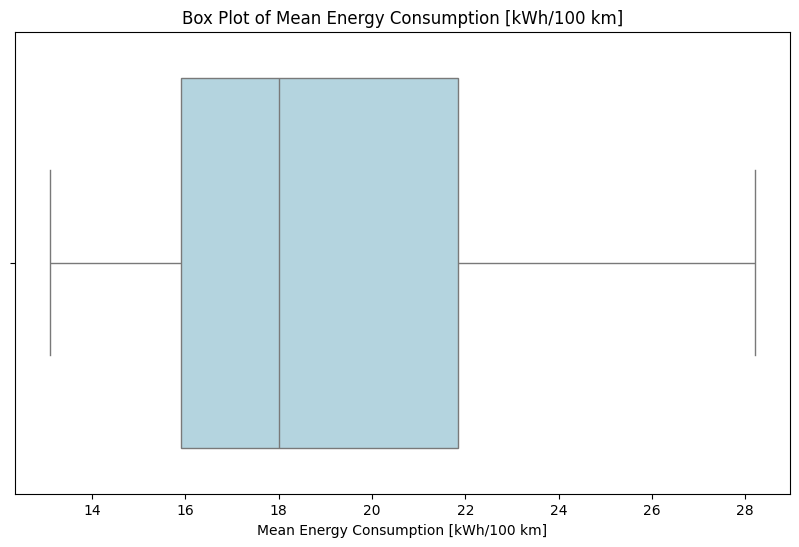

In [7]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["mean - Energy consumption [kWh/100 km]"], 
            color="lightblue")
plt.title("Box Plot of Mean Energy Consumption [kWh/100 km]")
plt.xlabel("Mean Energy Consumption [kWh/100 km]")
plt.show()


**Scatter Plot**

A scatter plot can help visualize the spread of energy consumption values and highlight outliers.

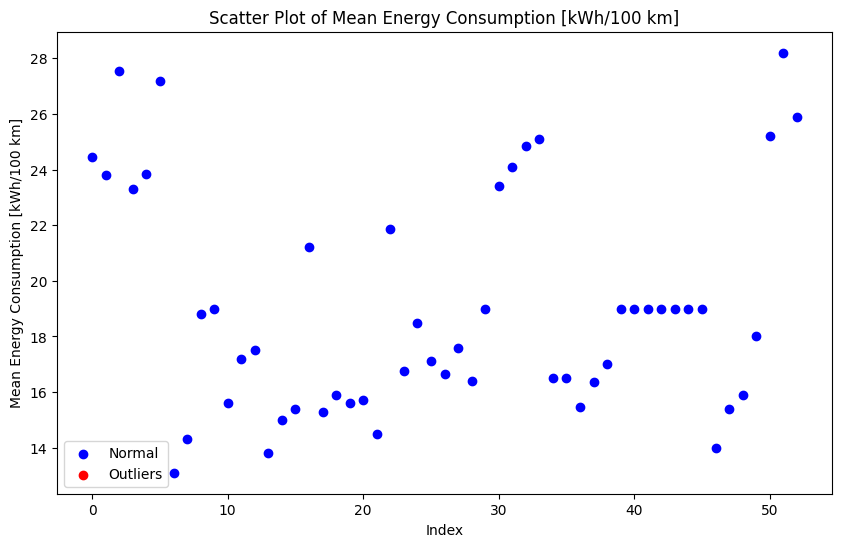

In [8]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, 
            df["mean - Energy consumption [kWh/100 km]"], 
            color="blue", label="Normal")
plt.scatter(outliers.index, 
            outliers["mean - Energy consumption [kWh/100 km]"], 
            color="red", label="Outliers")
plt.title("Scatter Plot of Mean Energy Consumption [kWh/100 km]")
plt.xlabel("Index")
plt.ylabel("Mean Energy Consumption [kWh/100 km]")
plt.legend()
plt.show()

**Step 6: Analyze the Results**

The graphs help visualize the outliers in the dataset:

- **Box Plot**: The box plot show the distribution of energy consumption, with outliers represented as individual points outside the whiskers.
- **Scatter Plot**: The scatter plot highlight the outliers in red, making it easy to identify which data points are unusual.


---